In [31]:
#pip install pandas matplotlib plotly scikit-learn seaborn

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
file_path = 'dataset/US_county_census_est_race_eth_2010_2019.csv'
df = pd.read_csv(file_path)

In [33]:
# Group data
state_group = df.groupby('state')[['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()
county_group = df.groupby('county')[['pop', 'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()
year_group = df.groupby('year')[['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()

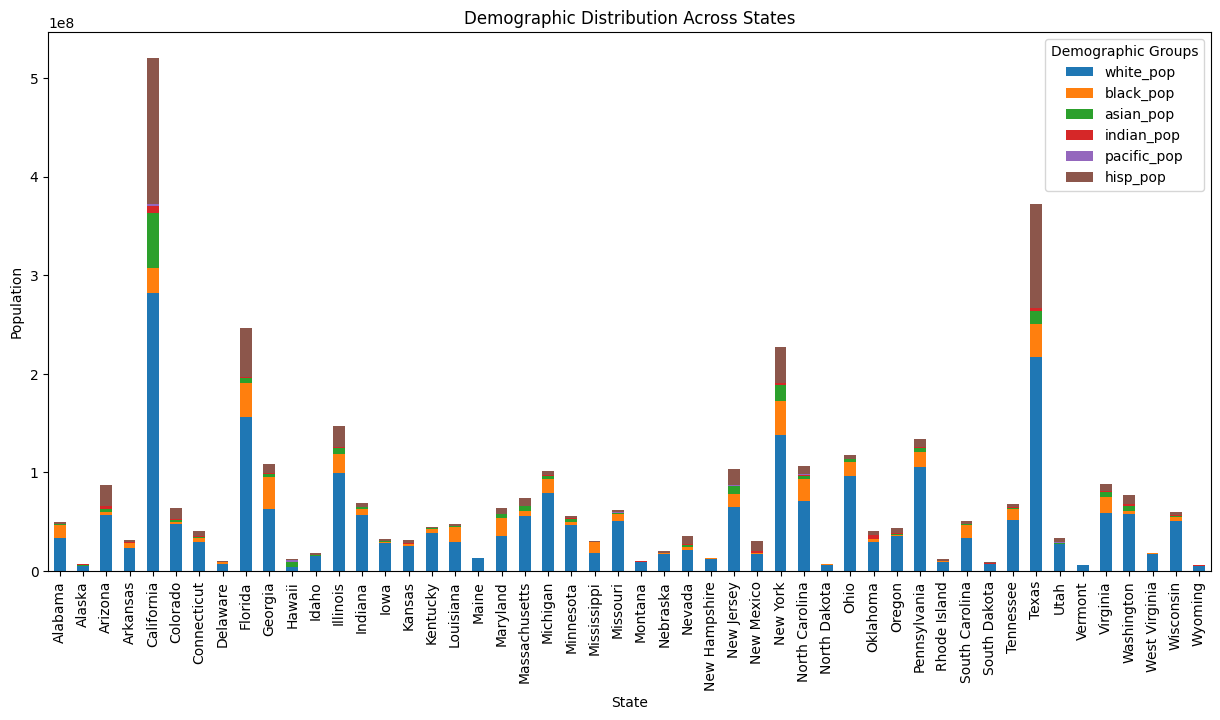

<Figure size 1500x1000 with 0 Axes>

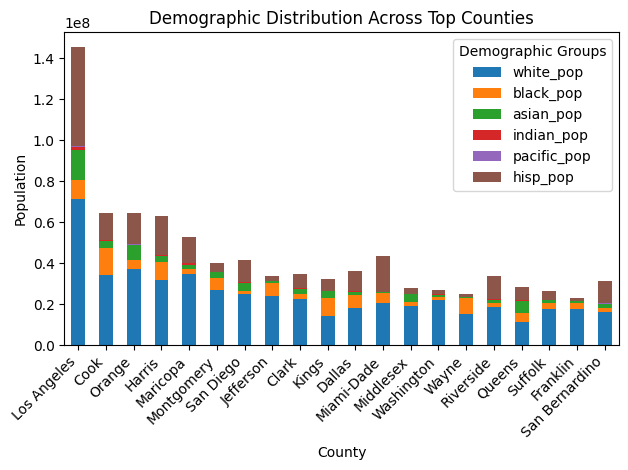

In [34]:
# Distribution of different demographic groups across states
state_group.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Demographic Distribution Across States')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend(title='Demographic Groups')
plt.show()

###
# Filter top N counties by total population
top_n = 20  # Adjust as needed
top_counties = county_group.nlargest(top_n, 'pop')
top_counties = top_counties.drop(columns='pop')

# Increase figure size and rotate x-axis labels for readability
plt.figure(figsize=(15, 10))
top_counties.plot(kind='bar', stacked=True)
plt.title('Demographic Distribution Across Top Counties')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Demographic Groups')
plt.tight_layout()
plt.show()


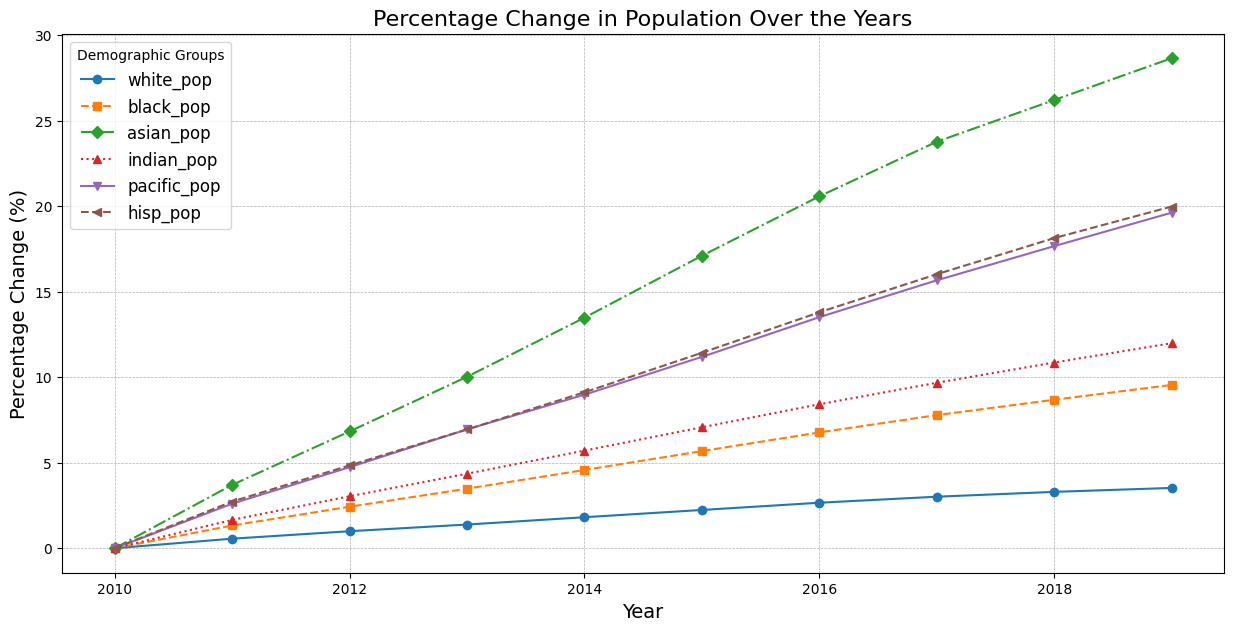

In [35]:


# Calculate the percentage change relative to the first year
initial_year = year_group.iloc[0]
year_group_percentage_change = (year_group / initial_year - 1) * 100

# Plot the percentage change trends over the years
fig, ax = plt.subplots(figsize=(15, 7))
markers = ['o', 's', 'D', '^', 'v', '<', '>']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
for i, column in enumerate(year_group_percentage_change.columns):
    ax.plot(year_group_percentage_change.index, year_group_percentage_change[column], marker=markers[i % len(markers)], linestyle=line_styles[i % len(line_styles)], label=column)

# Add title and labels
ax.set_title('Percentage Change in Population Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change (%)', fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
ax.legend(title='Demographic Groups', fontsize=12)

# Show plot
plt.show()

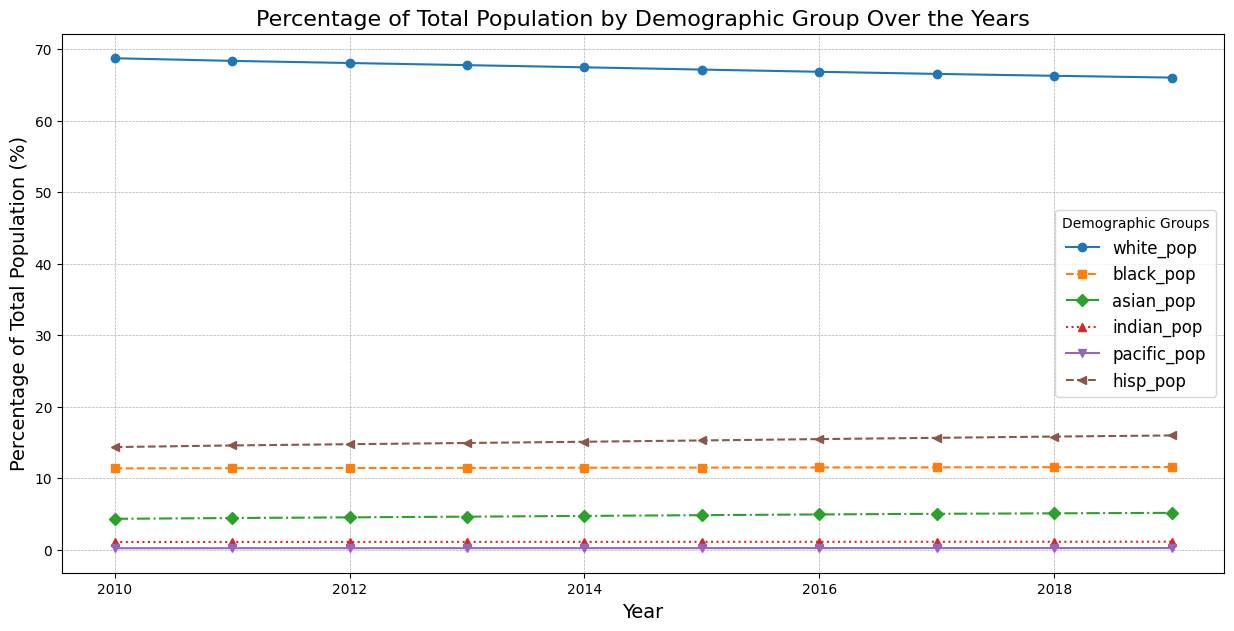

In [36]:
# Group by year and sum the population columns
year_group = df.groupby('year')[['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()

# Calculate the total population for each year
year_group['total_pop'] = year_group.sum(axis=1)

# Calculate the percentage each demographic group contributes to the total population
for column in year_group.columns[:-1]:  # Exclude the 'total_pop' column
    year_group[column + '_pct'] = (year_group[column] / year_group['total_pop']) * 100

# Select only the percentage columns
year_group_percentage = year_group[[col for col in year_group.columns if col.endswith('_pct')]]

# Plot the percentage trends over the years
fig, ax = plt.subplots(figsize=(15, 7))
markers = ['o', 's', 'D', '^', 'v', '<', '>']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
for i, column in enumerate(year_group_percentage.columns):
    ax.plot(year_group_percentage.index, year_group_percentage[column], marker=markers[i % len(markers)], linestyle=line_styles[i % len(line_styles)], label=column.replace('_pct', ''))

# Add title and labels
ax.set_title('Percentage of Total Population by Demographic Group Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage of Total Population (%)', fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
ax.legend(title='Demographic Groups', fontsize=12)

# Show plot
plt.show()

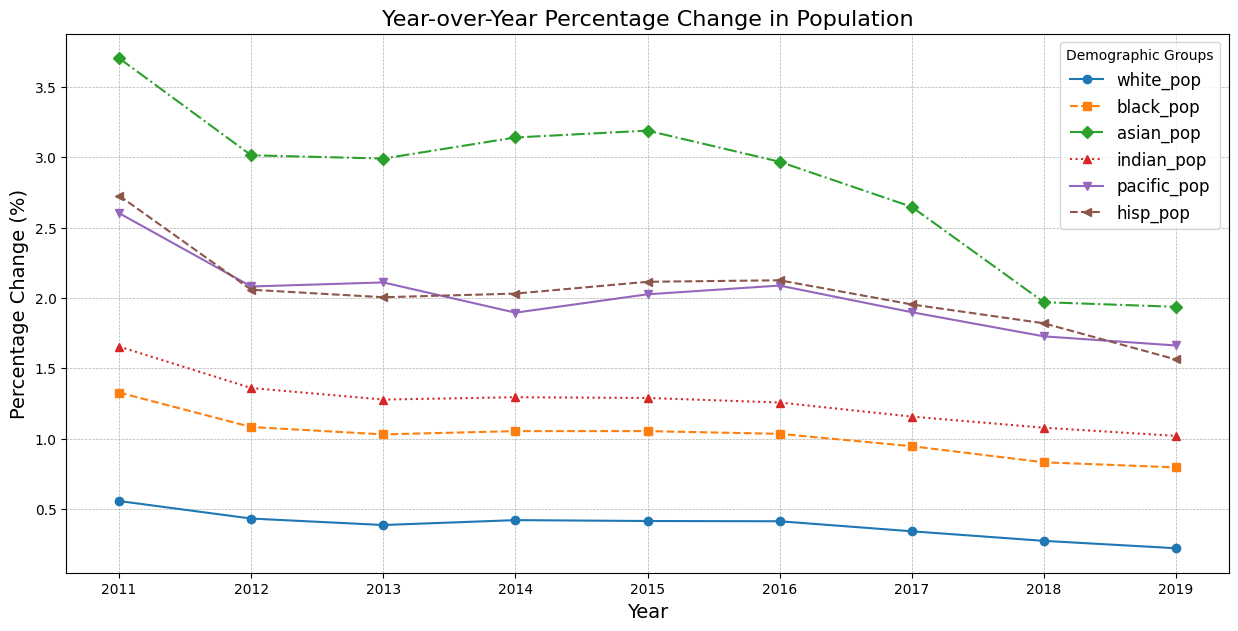

In [37]:
# Group by year and sum the population columns
year_group = df.groupby('year')[['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()

# Calculate the year-over-year percentage change
year_group_percentage_change = year_group.pct_change() * 100

# Plot the year-over-year percentage change trends over the years
fig, ax = plt.subplots(figsize=(15, 7))
markers = ['o', 's', 'D', '^', 'v', '<', '>']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
for i, column in enumerate(year_group_percentage_change.columns):
    ax.plot(year_group_percentage_change.index, year_group_percentage_change[column], marker=markers[i % len(markers)], linestyle=line_styles[i % len(line_styles)], label=column)

# Add title and labels
ax.set_title('Year-over-Year Percentage Change in Population', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change (%)', fontsize=14)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
ax.legend(title='Demographic Groups', fontsize=12)

# Show plot
plt.show()

C:\Users\hanse\AppData\Local\Temp\ipykernel_58036\717432329.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


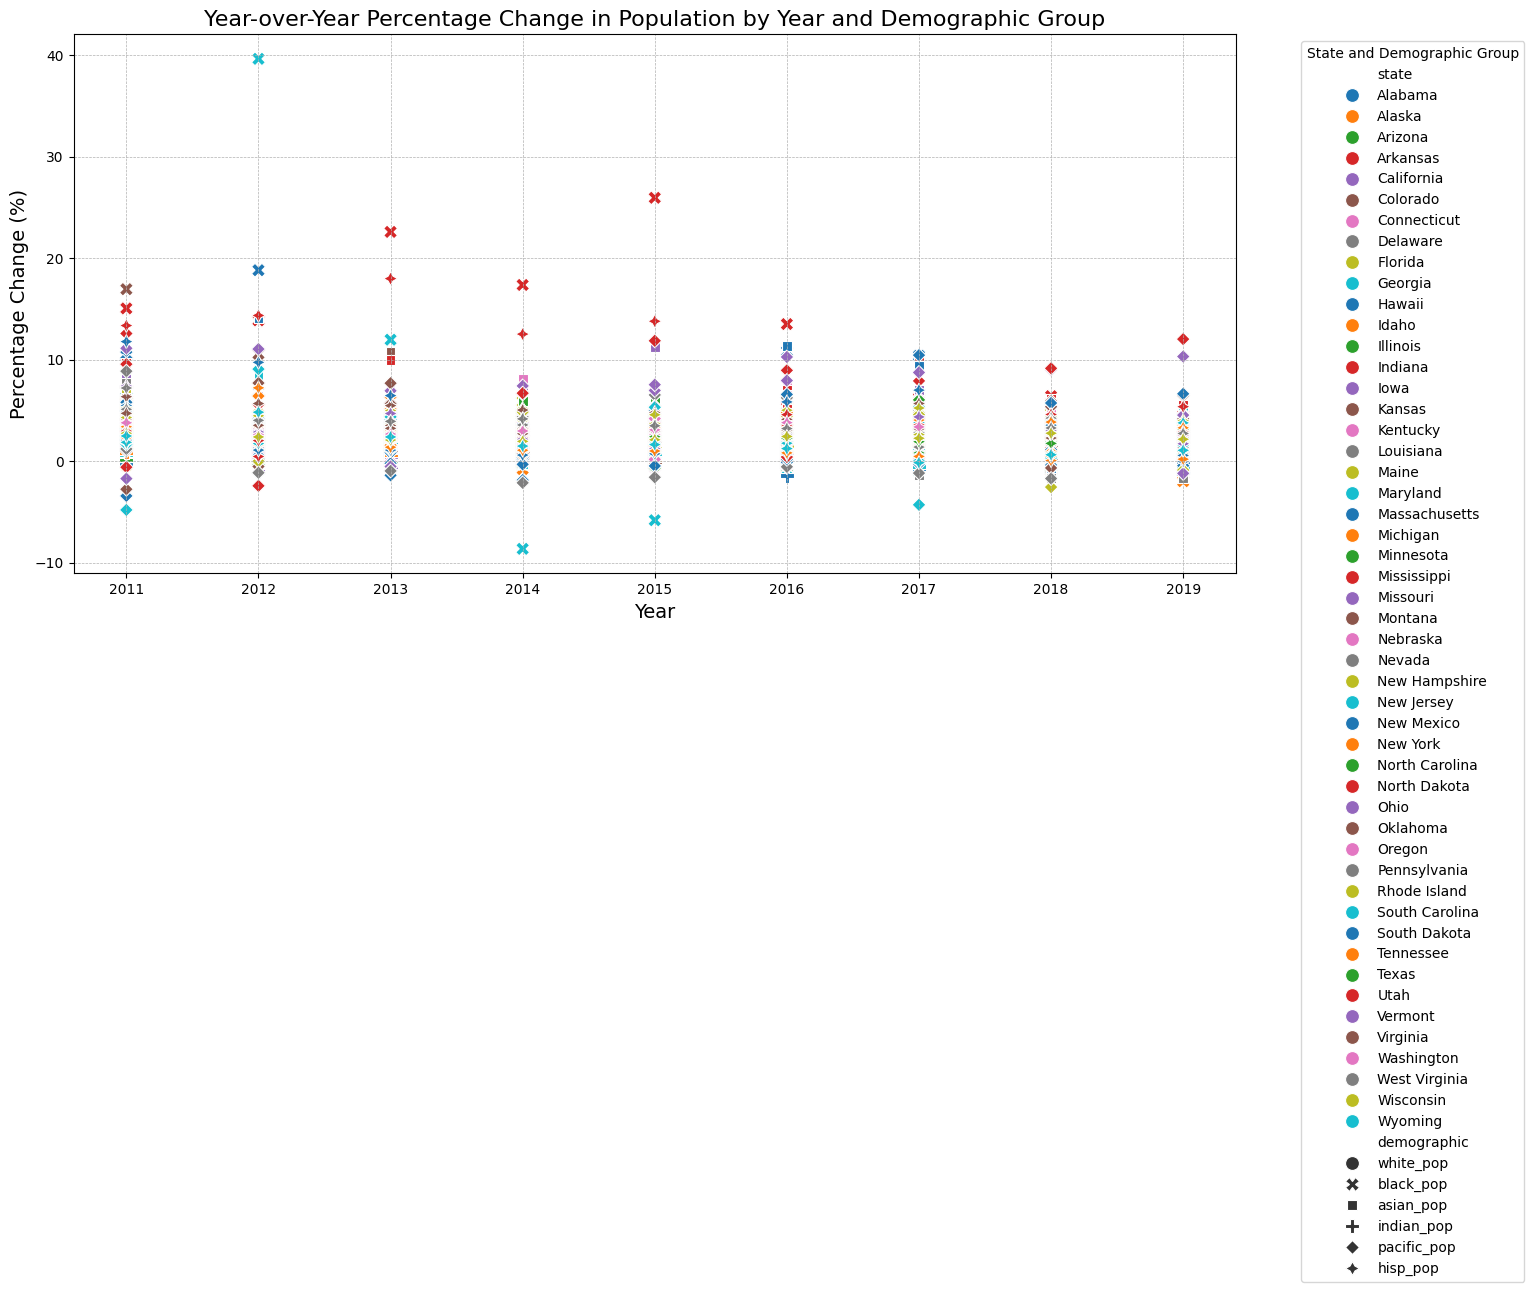

In [38]:
# Group by year and state and sum the population columns
year_state_group = df.groupby(['year', 'state'])[['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']].sum()

# Calculate the year-over-year percentage change for each state
year_state_pct_change = year_state_group.groupby(level=1).pct_change() * 100

# Reset index for easier plotting
year_state_pct_change = year_state_pct_change.reset_index()

# Melt the DataFrame for seaborn
melted = year_state_pct_change.melt(id_vars=['year', 'state'], var_name='demographic', value_name='pct_change')

# Create scatter plot
plt.figure(figsize=(15, 7))
sns.scatterplot(data=melted, x='year', y='pct_change', hue='state', style='demographic', palette='tab10', s=100)
plt.title('Year-over-Year Percentage Change in Population by Year and Demographic Group', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='State and Demographic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
# Select relevant features for clustering
features = ['white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'hisp_pop']

# Extract the features for clustering
X = df[features]


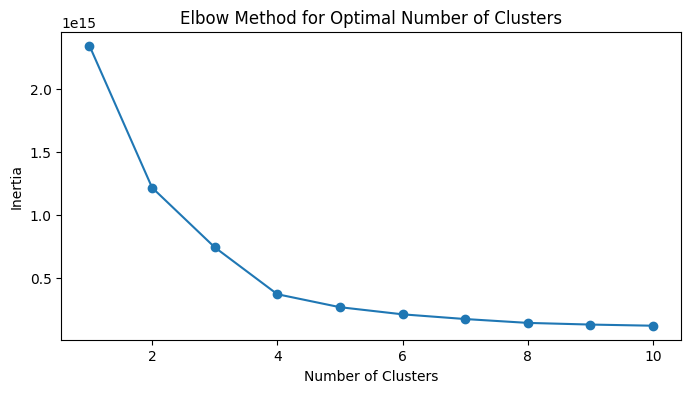

In [40]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

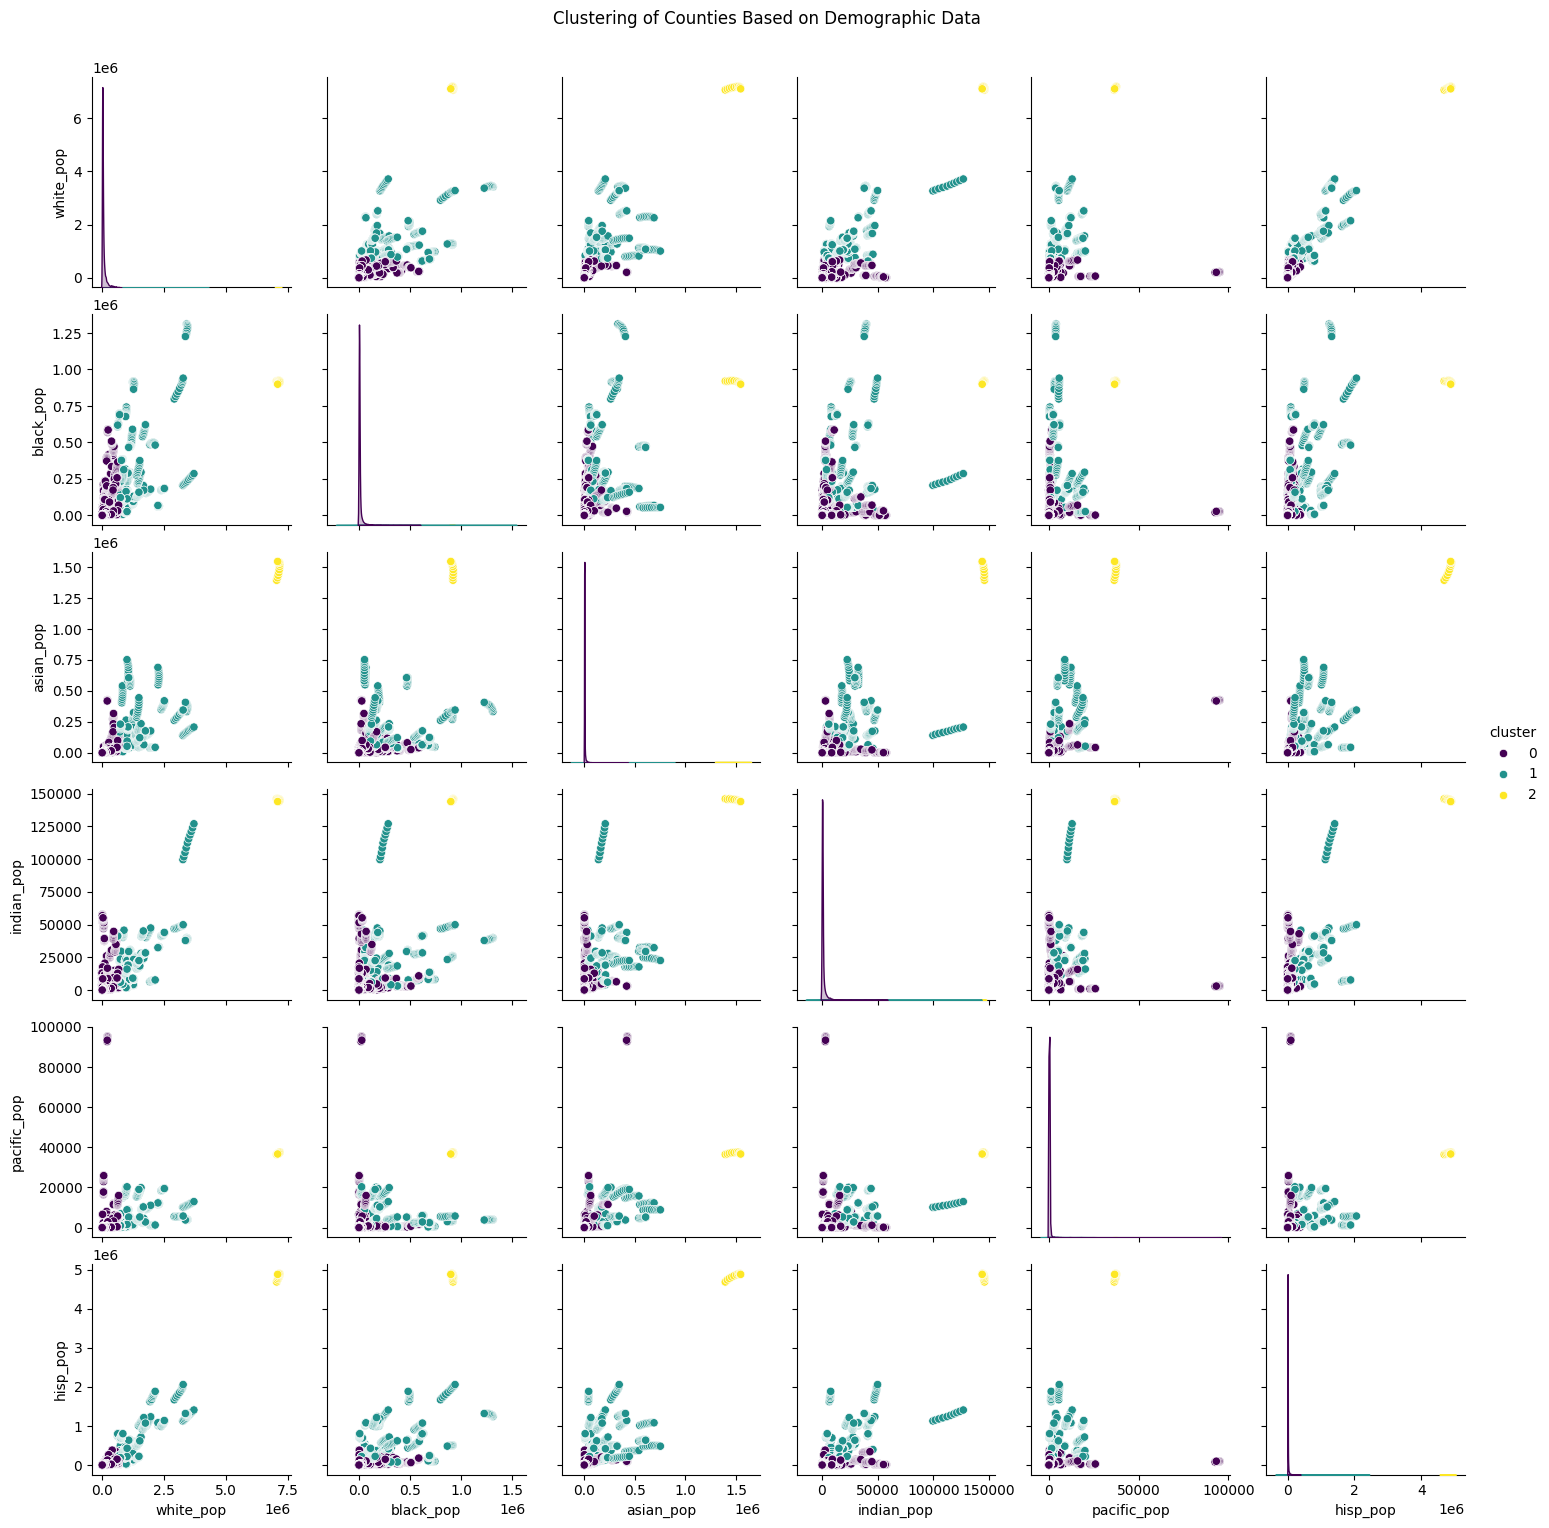

In [42]:
# Plot the clusters using a pair plot
sns.pairplot(df, vars=features, hue='cluster', palette='viridis')
plt.suptitle('Clustering of Counties Based on Demographic Data', y=1.02)
plt.show()

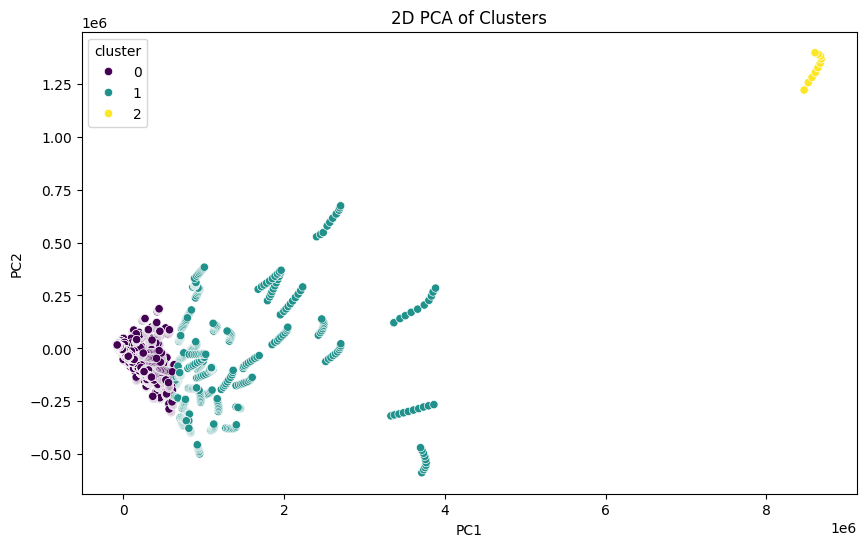

In [43]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='viridis', data=df_pca)
plt.title('2D PCA of Clusters')
plt.show()

In [44]:
# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('cluster')[features].mean()
print(cluster_means)

# This provides insights into the demographic composition of each cluster

            white_pop      black_pop     asian_pop     indian_pop  \
cluster                                                             
0        5.784863e+04    9062.739633  2.627176e+03     927.465323   
1        1.243227e+06  267784.053498  1.606605e+05   19719.927984   
2        7.132822e+06  915271.700000  1.482964e+06  145094.400000   

          pacific_pop      hisp_pop  
cluster                              
0          151.051886  8.263244e+03  
1         4893.117284  5.192938e+05  
2        37062.500000  4.830965e+06  


In [45]:
# Create a table of counties and their clusters
county_cluster_table = df[['county', 'cluster']]

# Save the table to a CSV file
county_cluster_table.to_csv('county_cluster_table.csv', index=False)

# Display the table
print(county_cluster_table)

        county  cluster
0      Autauga        0
1      Autauga        0
2      Autauga        0
3      Autauga        0
4      Autauga        0
...        ...      ...
31405   Weston        0
31406   Weston        0
31407   Weston        0
31408   Weston        0
31409   Weston        0

[31410 rows x 2 columns]


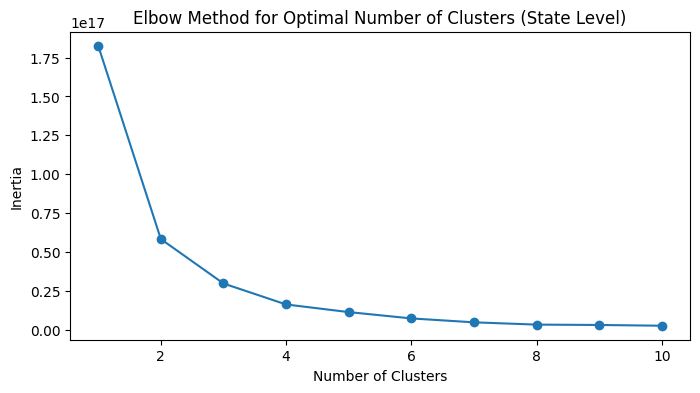

In [46]:
X_state = state_group[features]

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_state)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (State Level)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means with the chosen number of clusters
n_clusters = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_group['cluster'] = kmeans.fit_predict(X_state)

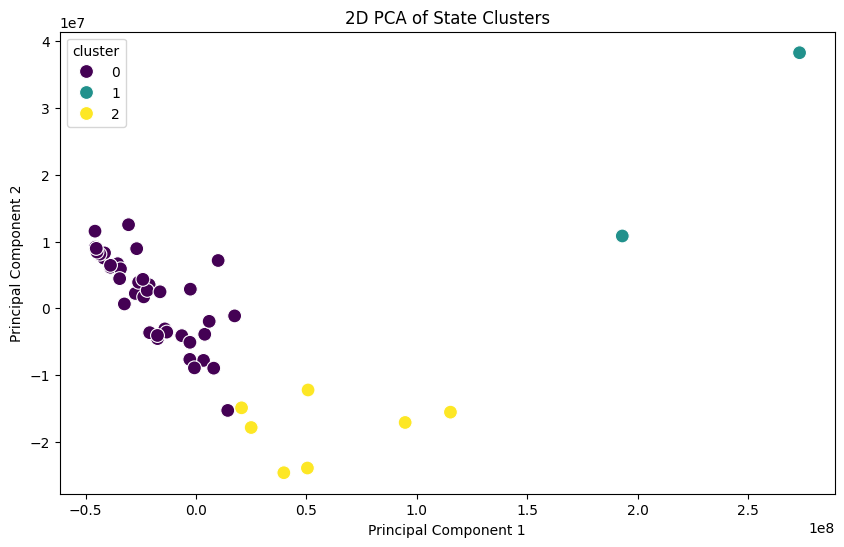

In [47]:
# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_state_pca = pca.fit_transform(X_state)

# Create a DataFrame for the PCA results
df_state_pca = pd.DataFrame(data=X_state_pca, columns=['PC1', 'PC2'])
df_state_pca['cluster'] = state_group['cluster'].values
df_state_pca['state'] = state_group.index  # Add state names for better interpretation

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='viridis', data=df_state_pca, s=100)
plt.title('2D PCA of State Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate the points with state names
#for line in range(0, df_state_pca.shape[0]):
#    plt.text(df_state_pca.PC1[line], df_state_pca.PC2[line], 
#             df_state_pca.state[line], horizontalalignment='left', 
#             size='medium', color='black', weight='semibold')

plt.show()

In [48]:
# Create a table of states and their clusters
state_cluster_table = state_group[['cluster']]

# Save the table to a CSV file
state_cluster_table.to_csv('state_cluster_table.csv', index=True, index_label='state')

# Display the table
print(state_cluster_table)


                cluster
state                  
Alabama               0
Alaska                0
Arizona               0
Arkansas              0
California            1
Colorado              0
Connecticut           0
Delaware              0
Florida               2
Georgia               0
Hawaii                0
Idaho                 0
Illinois              2
Indiana               0
Iowa                  0
Kansas                0
Kentucky              0
Louisiana             0
Maine                 0
Maryland              0
Massachusetts         0
Michigan              2
Minnesota             0
Mississippi           0
Missouri              0
Montana               0
Nebraska              0
Nevada                0
New Hampshire         0
New Jersey            0
New Mexico            0
New York              2
North Carolina        2
North Dakota          0
Ohio                  2
Oklahoma              0
Oregon                0
Pennsylvania          2
Rhode Island          0
South Carolina  